### Credit: Team Member (@ Roissyah Fernanda)

In [47]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import haversine_distances
import math
from numpy import cos, sin, arcsin, sqrt, arctan2
from math import radians

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [6]:
# this is the dataset we obtained from scraping
# the original train dataset just contains 5 columns

df = pd.read_csv('ristek-data/train_fix.csv').drop(columns='Unnamed: 0.1', axis=1)
df.head()

,waktu_setempat,id_jalan,id_titik_mulai,id_titik_akhir,rerata_kecepatan,Unnamed: 0_x,Latitude_awal,Longitude_awal,id_mulai,Unnamed: 0_y,...,class:bicycle:commute,horse,oneway,busway,turn:lanes:forward,id,Unnamed: 0,Latitude_akhir,Longitude_akhir,id_akhir
0,2020-02-01 01:00:00+00:00,691007296,21390008,1425033102,29.126,269,51.465569,-0.155776,21390008,6,...,NaN,NaN,NaN,NaN,NaN,691007296,67,51.459674,-0.125757,1425033102
1,2020-02-01 01:00:00+00:00,47010584,1677092762,579493410,46.576,287,51.577065,-0.197102,1677092762,13,...,NaN,NaN,NaN,NaN,NaN,47010584,475,51.447927,-0.113136,579493410
2,2020-02-01 01:00:00+00:00,22932408,26486694,1930267566,36.587,21,51.622181,-0.176552,26486694,2,...,NaN,NaN,NaN,NaN,NaN,22932408,97,51.532494,-0.145636,1930267566
3,2020-02-01 01:00:00+00:00,142479648,1111592522,3775231113,34.063,295,51.530407,-0.228608,1111592522,10,...,NaN,NaN,NaN,NaN,NaN,142479648,237,51.449898,-0.240953,3775231113
4,2020-02-01 01:00:00+00:00,8504977,5940503398,5940503394,38.336,63,51.447927,-0.113136,5940503398,7,...,NaN,NaN,NaN,NaN,NaN,8504977,119,51.432267,-0.163885,5940503394


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398648 entries, 0 to 398647
Data columns (total 47 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   waktu_setempat          398648 non-null  object 
 1   id_jalan                398648 non-null  int64  
 2   id_titik_mulai          398648 non-null  int64  
 3   id_titik_akhir          398648 non-null  int64  
 4   rerata_kecepatan        398648 non-null  float64
 5   Unnamed: 0_x            398648 non-null  int64  
 6   Latitude_awal           392561 non-null  float64
 7   Longitude_awal          392561 non-null  float64
 8   id_mulai                398648 non-null  int64  
 9   Unnamed: 0_y            398648 non-null  int64  
 10  highway                 398648 non-null  object 
 11  lit                     398648 non-null  object 
 12  maxspeed                398648 non-null  object 
 13  name                    398648 non-null  object 
 14  not:name            

# Data Cleansing

In [9]:
# check missing values
total_missing = df.isnull().sum().sort_values(ascending=False)
percentage = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percentage, dtypes], axis=1, keys=['Total', 'Percent'])
missing_data['Data Types'] = df.dtypes
missing_data

,Total,Percent,Data Types
class:bicycle:commute,381378,0.956679,float64
horse,381378,0.956679,object
turn:lanes:forward,380829,0.955301,object
source:maxspeed,380462,0.954381,object
wikidata,380462,0.954381,object
lane_markings,380423,0.954283,object
sidewalk:both,379670,0.952394,object
not:name,379056,0.950854,object
busway,378760,0.950111,object
source,377812,0.947733,object


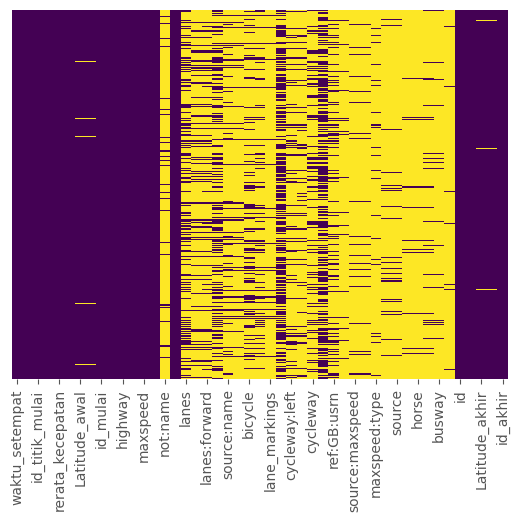

In [10]:
# observe the missing values to find out if there any relation
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [12]:
to_explore = df[['surface', 'sidewalk', 'ref', 'id_jalan', 'name', 'maxspeed', 'lit', 'highway',
                'id_titik_mulai', 'id_titik_akhir',
                'lanes', 'lanes:forward', 'lanes:backward', 'foot',
                 'turn:lanes:forward', 'ref:GB:usrn', 'lane_markings',
                'cycleway', 'cycleway:right', 'source', 'source:name']]

for column in to_explore:
    print(to_explore[column].unique())
    print('=='*30)
    print(to_explore[column].nunique())

['asphalt' nan]
1
['both' nan 'separate']
2
['A204' 'A598' 'A205' 'A4201' 'A404' 'B221' 'A1000' 'A3036' 'A118' 'B237'
 'A24' 'A23' 'A3' 'A306' 'A2217' 'B317']
16
[691007296  47010584  22932408 142479648   8504977  50841260   4060819
  24704286   4061596   4004732   3688059  66924592   3691841  97453767
   4898588  26785612 182210371 150783571  40044423      1210]
20
['Tulse Hill' 'Finchley Road' 'Upper Richmond Road' 'Albany Street'
 'Harrow Road' 'Kings Avenue' 'High Road' 'Lavender Hill' 'Romford Road'
 'Nightingale Lane' 'Upper Richmond Road West' 'Clapham Common South Side'
 'Brixton Road' 'Upper Tooting Road' 'Clapham Road' 'Roehampton Lane'
 'Acre Lane' 'North End Road' 'Brixton Hill']
19
['20 mph' '30 mph']
2
['yes']
1
['primary' 'trunk' 'secondary']
3
[  21390008 1677092762   26486694 1111592522 5940503398 5224440152
   21539432   43405913 6343348893 1623681994     227757   21504099
   32046542     196051 2951577723  111950921   26346792   17899276
   33203760  267341420   1789

[nan 'yes']
1
[nan 'left;through|through;right']
1
[nan '20201241;20204211' '22902838' '22201573' '22903508']
4
[nan 'no']
1
[nan 'advisory' 'share_busway' 'lane']
3
[nan 'no' 'lane' 'share_busway']
3
[nan 'yahoo']
1
[nan 'local knowledge' 'photograph']
2


In [13]:
# filling missing value with "tidak tersedia"
df_no_nan = df.fillna("tidak_tersedia")
df_no_nan.head()

,waktu_setempat,id_jalan,id_titik_mulai,id_titik_akhir,rerata_kecepatan,Unnamed: 0_x,Latitude_awal,Longitude_awal,id_mulai,Unnamed: 0_y,...,class:bicycle:commute,horse,oneway,busway,turn:lanes:forward,id,Unnamed: 0,Latitude_akhir,Longitude_akhir,id_akhir
0,2020-02-01 01:00:00+00:00,691007296,21390008,1425033102,29.126,269,51.465569,-0.155776,21390008,6,...,tidak_tersedia,tidak_tersedia,tidak_tersedia,tidak_tersedia,tidak_tersedia,691007296,67,51.459674,-0.125757,1425033102
1,2020-02-01 01:00:00+00:00,47010584,1677092762,579493410,46.576,287,51.577065,-0.197102,1677092762,13,...,tidak_tersedia,tidak_tersedia,tidak_tersedia,tidak_tersedia,tidak_tersedia,47010584,475,51.447927,-0.113136,579493410
2,2020-02-01 01:00:00+00:00,22932408,26486694,1930267566,36.587,21,51.622181,-0.176552,26486694,2,...,tidak_tersedia,tidak_tersedia,tidak_tersedia,tidak_tersedia,tidak_tersedia,22932408,97,51.532494,-0.145636,1930267566
3,2020-02-01 01:00:00+00:00,142479648,1111592522,3775231113,34.063,295,51.530407,-0.228608,1111592522,10,...,tidak_tersedia,tidak_tersedia,tidak_tersedia,tidak_tersedia,tidak_tersedia,142479648,237,51.449898,-0.240953,3775231113
4,2020-02-01 01:00:00+00:00,8504977,5940503398,5940503394,38.336,63,51.447927,-0.113136,5940503398,7,...,tidak_tersedia,tidak_tersedia,tidak_tersedia,tidak_tersedia,tidak_tersedia,8504977,119,51.432267,-0.163885,5940503394


In [14]:
df_no_nan.isnull().sum()

waktu_setempat            0
id_jalan                  0
id_titik_mulai            0
id_titik_akhir            0
rerata_kecepatan          0
Unnamed: 0_x              0
Latitude_awal             0
Longitude_awal            0
id_mulai                  0
Unnamed: 0_y              0
highway                   0
lit                       0
maxspeed                  0
name                      0
not:name                  0
ref                       0
lanes                     0
lanes:backward            0
lanes:forward             0
operator                  0
source:name               0
source:ref                0
bicycle                   0
foot                      0
lane_markings             0
sidewalk                  0
cycleway:left             0
cycleway:right            0
cycleway                  0
surface                   0
ref:GB:usrn               0
sidewalk:both             0
source:maxspeed           0
wikidata                  0
maxspeed:type             0
pavement:minimum_wid

In [16]:
# drop columns with missing value > 65%
# drop rows that contain "tidak_tersedia" especially in these columns:
# 'Latitude_awal', 'Longitude_awal', 'Latitude_akhir', 'Longitude_akhir'
# because later, we gonna calculate harversine distance
# why we must drop them? there's no way to imput those values and dropping those rows is still acceptable as the percentage of missing value is around 0.015%

df_clean = df_no_nan[(df_no_nan['Latitude_awal'] != 'tidak_tersedia') & (df_no_nan['Latitude_akhir'] != 'tidak_tersedia')]

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387023 entries, 0 to 398647
Data columns (total 47 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   waktu_setempat          387023 non-null  object 
 1   id_jalan                387023 non-null  int64  
 2   id_titik_mulai          387023 non-null  int64  
 3   id_titik_akhir          387023 non-null  int64  
 4   rerata_kecepatan        387023 non-null  float64
 5   Unnamed: 0_x            387023 non-null  int64  
 6   Latitude_awal           387023 non-null  object 
 7   Longitude_awal          387023 non-null  object 
 8   id_mulai                387023 non-null  int64  
 9   Unnamed: 0_y            387023 non-null  int64  
 10  highway                 387023 non-null  object 
 11  lit                     387023 non-null  object 
 12  maxspeed                387023 non-null  object 
 13  name                    387023 non-null  object 
 14  not:name            

In [17]:
# only use some columns
# missing values di columns: 'surface', 'sidewalk' is null as the value isn't available

df_ready = df_clean.loc[:,('waktu_setempat', 'id_jalan', 'ref', 'name',
                           'id_titik_mulai', 'id_titik_akhir', 'rerata_kecepatan',
                           'Latitude_awal', 'Longitude_awal', 'id_mulai',
                           'Latitude_akhir', 'Longitude_akhir', 'id_akhir',
                           'surface', 'sidewalk',
                           'maxspeed', 'lit', 'highway')]

df_ready.head()

,waktu_setempat,id_jalan,ref,name,id_titik_mulai,id_titik_akhir,rerata_kecepatan,Latitude_awal,Longitude_awal,id_mulai,Latitude_akhir,Longitude_akhir,id_akhir,surface,sidewalk,maxspeed,lit,highway
0,2020-02-01 01:00:00+00:00,691007296,A204,Tulse Hill,21390008,1425033102,29.126,51.465569,-0.155776,21390008,51.459674,-0.125757,1425033102,asphalt,both,20 mph,yes,primary
1,2020-02-01 01:00:00+00:00,47010584,A598,Finchley Road,1677092762,579493410,46.576,51.577065,-0.197102,1677092762,51.447927,-0.113136,579493410,tidak_tersedia,both,30 mph,yes,primary
2,2020-02-01 01:00:00+00:00,22932408,A205,Upper Richmond Road,26486694,1930267566,36.587,51.622181,-0.176552,26486694,51.532494,-0.145636,1930267566,tidak_tersedia,both,30 mph,yes,trunk
3,2020-02-01 01:00:00+00:00,142479648,A4201,Albany Street,1111592522,3775231113,34.063,51.530407,-0.228608,1111592522,51.449898,-0.240953,3775231113,asphalt,both,20 mph,yes,primary
4,2020-02-01 01:00:00+00:00,8504977,A404,Harrow Road,5940503398,5940503394,38.336,51.447927,-0.113136,5940503398,51.432267,-0.163885,5940503394,asphalt,tidak_tersedia,30 mph,yes,primary


# Feature Engineering

## 'Jarak'

In [18]:
def haversine_distance(row):
    R = 6371  # earth radius in kilometer

    lat1 = np.radians(row['Latitude_awal'])
    lon1 = np.radians(row['Longitude_awal'])
    lat2 = np.radians(row['Latitude_akhir'])
    lon2 = np.radians(row['Longitude_akhir'])

    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    distance = R * c
    return distance

# add 'jarak' column in df_ready
df_ready['jarak'] = df_ready.apply(haversine_distance, axis=1)

In [21]:
df_ready.head()

,waktu_setempat,id_jalan,ref,name,id_titik_mulai,id_titik_akhir,rerata_kecepatan,Latitude_awal,Longitude_awal,id_mulai,Latitude_akhir,Longitude_akhir,id_akhir,surface,sidewalk,maxspeed,lit,highway,jarak
0,2020-02-01 01:00:00+00:00,691007296,A204,Tulse Hill,21390008,1425033102,29.126,51.465569,-0.155776,21390008,51.459674,-0.125757,1425033102,asphalt,both,20 mph,yes,primary,2.180476
1,2020-02-01 01:00:00+00:00,47010584,A598,Finchley Road,1677092762,579493410,46.576,51.577065,-0.197102,1677092762,51.447927,-0.113136,579493410,tidak_tersedia,both,30 mph,yes,primary,15.490651
2,2020-02-01 01:00:00+00:00,22932408,A205,Upper Richmond Road,26486694,1930267566,36.587,51.622181,-0.176552,26486694,51.532494,-0.145636,1930267566,tidak_tersedia,both,30 mph,yes,trunk,10.199061
3,2020-02-01 01:00:00+00:00,142479648,A4201,Albany Street,1111592522,3775231113,34.063,51.530407,-0.228608,1111592522,51.449898,-0.240953,3775231113,asphalt,both,20 mph,yes,primary,8.992914
4,2020-02-01 01:00:00+00:00,8504977,A404,Harrow Road,5940503398,5940503394,38.336,51.447927,-0.113136,5940503398,51.432267,-0.163885,5940503394,asphalt,tidak_tersedia,30 mph,yes,primary,3.924888


## 'Waktu setempat'

In [22]:
# convert object to datetime
df_ready['waktu_setempat'] = pd.to_datetime(df_ready['waktu_setempat'])

In [23]:
# split datetime into days, and hours

df_ready['hari'] = df_ready['waktu_setempat'].dt.day_of_week
df_ready['jam'] = df_ready['waktu_setempat'].dt.hour

# decode 1-5 in hari to string
def day_string(day):
    if day == 0:
        return 'Senin'
    elif day == 1:
        return 'Selasa'
    elif day == 2:
        return 'Rabu'
    elif day == 3:
        return 'Kamis'
    elif day == 4:
        return 'Jum\'at'
    elif day == 5:
        return 'Sabtu'
    else:
        return 'Minggu'
    
# Function to categorize time according to rush hour (return int)
def categorize_time_of_day(hour):
    if 7 <= hour < 10: # jam berangkat
        return 1
    elif 10 <= hour < 16: # jam orang lagi ngantor
        return 2
    elif 16 <= hour < 19: # jam pulang
        return 3
    else:
        return 4
    
# Function to categorize time according to rush hour (return string)
def time_of_day_string(hour):
    if 7 <= hour < 10: 
        return "Jam berangkat"
    elif 10 <= hour < 16: 
        return "Jam kerja"
    elif 16 <= hour < 19: 
        return "Jam pulang"
    else:
        return "Jam malam"
    
# Function to categorize days into weekday and weekend (return int)
def categorize_weekend(day):
    if day.day_of_week < 5:  # 0-4 adalah Senin-Jumat
        return 1
    else:
        return 0
    
# Function to categorize days into weekday and weekend (return string)
def weekend_string(day):
    if day.day_of_week < 5:
        return "Weekday"
    else:
        return "Weekend"

# Apply above functions into 'waktu_setempat', producing new columns
df_ready['kategori_jam'] = df_ready['waktu_setempat'].dt.hour.apply(categorize_time_of_day)
df_ready['hari_string'] = df_ready['waktu_setempat'].dt.day_of_week.apply(day_string)
df_ready['kategori_jam_string'] = df_ready['waktu_setempat'].dt.hour.apply(time_of_day_string)
df_ready['weekend'] = df_ready['waktu_setempat'].apply(categorize_weekend)
df_ready['weekend_string'] = df_ready['waktu_setempat'].apply(weekend_string)

df_ready.head()

,waktu_setempat,id_jalan,ref,name,id_titik_mulai,id_titik_akhir,rerata_kecepatan,Latitude_awal,Longitude_awal,id_mulai,...,lit,highway,jarak,hari,jam,kategori_jam,hari_string,kategori_jam_string,weekend,weekend_string
0,2020-02-01 01:00:00+00:00,691007296,A204,Tulse Hill,21390008,1425033102,29.126,51.465569,-0.155776,21390008,...,yes,primary,2.180476,5,1,4,Sabtu,Jam malam,0,Weekend
1,2020-02-01 01:00:00+00:00,47010584,A598,Finchley Road,1677092762,579493410,46.576,51.577065,-0.197102,1677092762,...,yes,primary,15.490651,5,1,4,Sabtu,Jam malam,0,Weekend
2,2020-02-01 01:00:00+00:00,22932408,A205,Upper Richmond Road,26486694,1930267566,36.587,51.622181,-0.176552,26486694,...,yes,trunk,10.199061,5,1,4,Sabtu,Jam malam,0,Weekend
3,2020-02-01 01:00:00+00:00,142479648,A4201,Albany Street,1111592522,3775231113,34.063,51.530407,-0.228608,1111592522,...,yes,primary,8.992914,5,1,4,Sabtu,Jam malam,0,Weekend
4,2020-02-01 01:00:00+00:00,8504977,A404,Harrow Road,5940503398,5940503394,38.336,51.447927,-0.113136,5940503398,...,yes,primary,3.924888,5,1,4,Sabtu,Jam malam,0,Weekend


# Exploratory Data Analysis

C:\Users\Roisyah\AppData\Local\Temp\ipykernel_1440\497666818.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


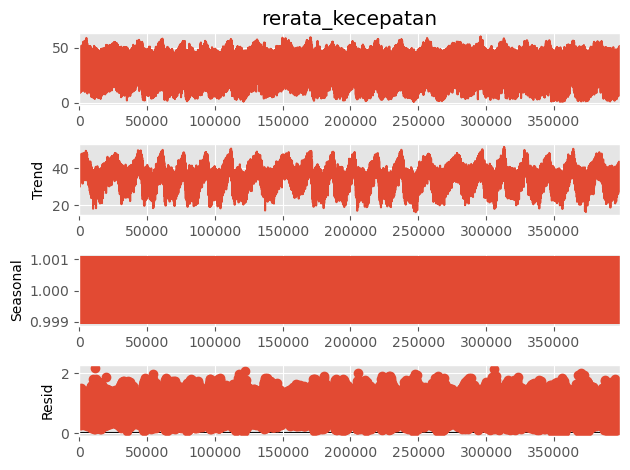

In [24]:
# Decompose 'rerata_kecepatan' to get the trend, seasonality, and noise
# period 7 means we have daily data, and we want to observe the weekly trend

decompose_speed = seasonal_decompose(df_ready.rerata_kecepatan, model='multiplicative', period=7)
fig = decompose_speed.plot()
fig.show()

## 1. How is the time series plot of the 'rerata_kecepatan' per day, and per hour category?

C:\Users\Roisyah\AppData\Local\Temp\ipykernel_1440\3884265025.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


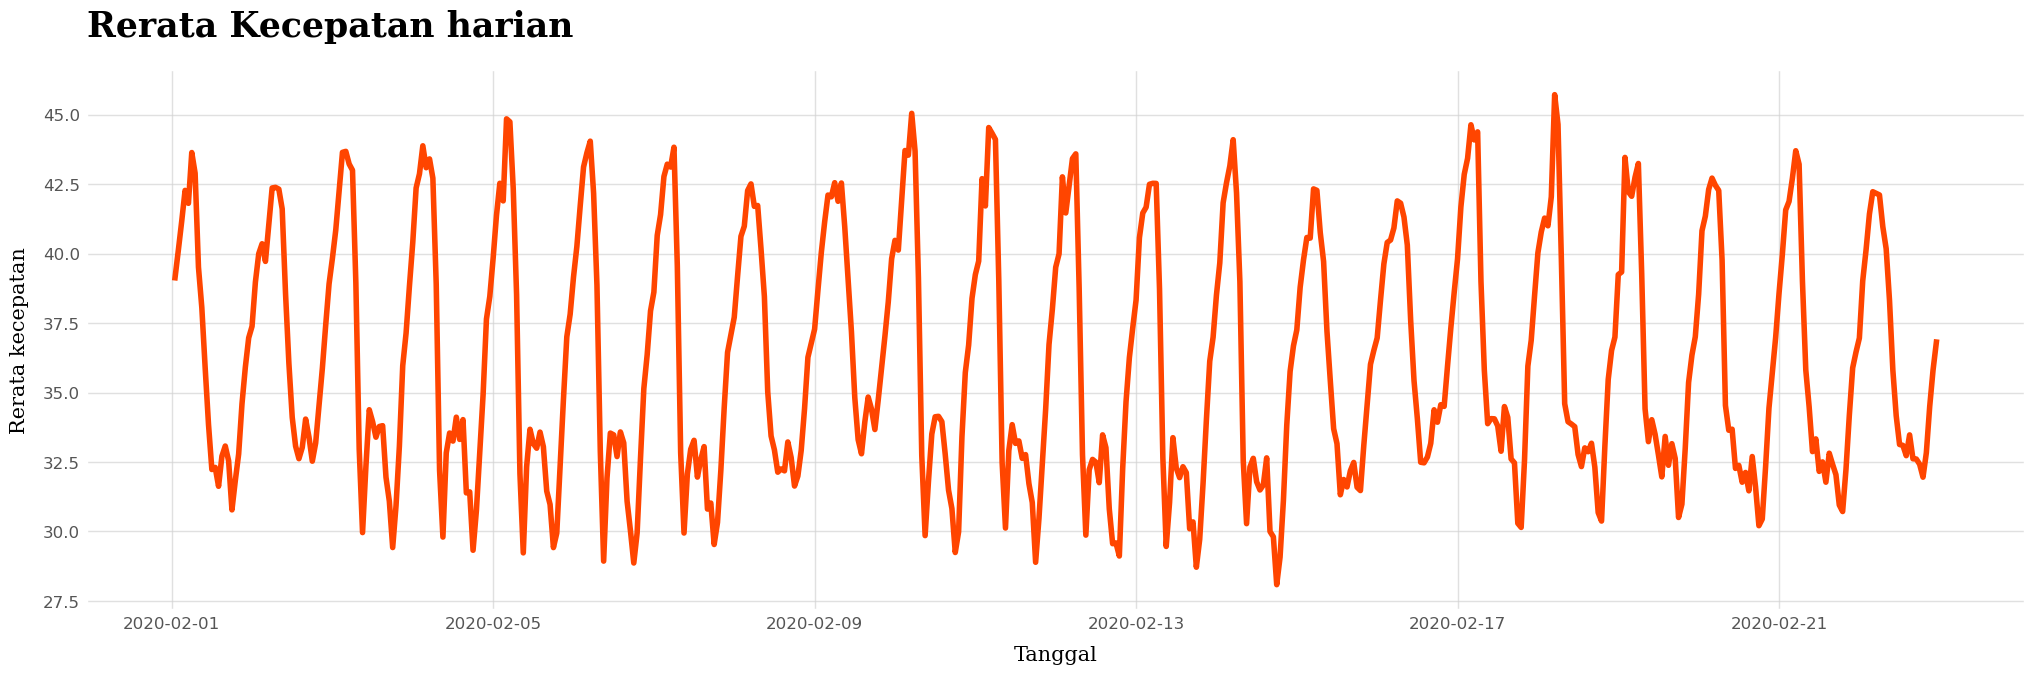

In [25]:
fig = plt.figure(figsize=(25, 7))
fig.set_facecolor("#fff")
ax = fig.add_subplot()
ax.set_facecolor("#fff")
ax.grid(color="lightgrey", alpha=0.7, linewidth=1, axis="both", zorder=0)
sns.lineplot(x="waktu_setempat", y="rerata_kecepatan", color="orangered", err_style=None, data=df_ready, linewidth=4, ax=ax, zorder=2)
ax.yaxis.set_tick_params(color="#000", labelsize=12, pad=5, length=0)
ax.set_ylabel("Rerata kecepatan", fontsize=15, fontfamily="serif", labelpad=10)
ax.set_xlabel("Tanggal", fontsize=15, fontfamily="serif", labelpad=10)
ax.xaxis.set_tick_params(color="#000", labelsize=12, pad=5, length=0)
ax.yaxis.set_tick_params(color="#000", labelsize=12, pad=5, length=0)
ax.set_title("Rerata Kecepatan harian", loc="left", color="#000", fontsize=25, pad=5, fontweight="bold", fontfamily="serif", y=1.05, zorder=3)
fig.show()

C:\Users\Roisyah\AppData\Local\Temp\ipykernel_1440\3650383645.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


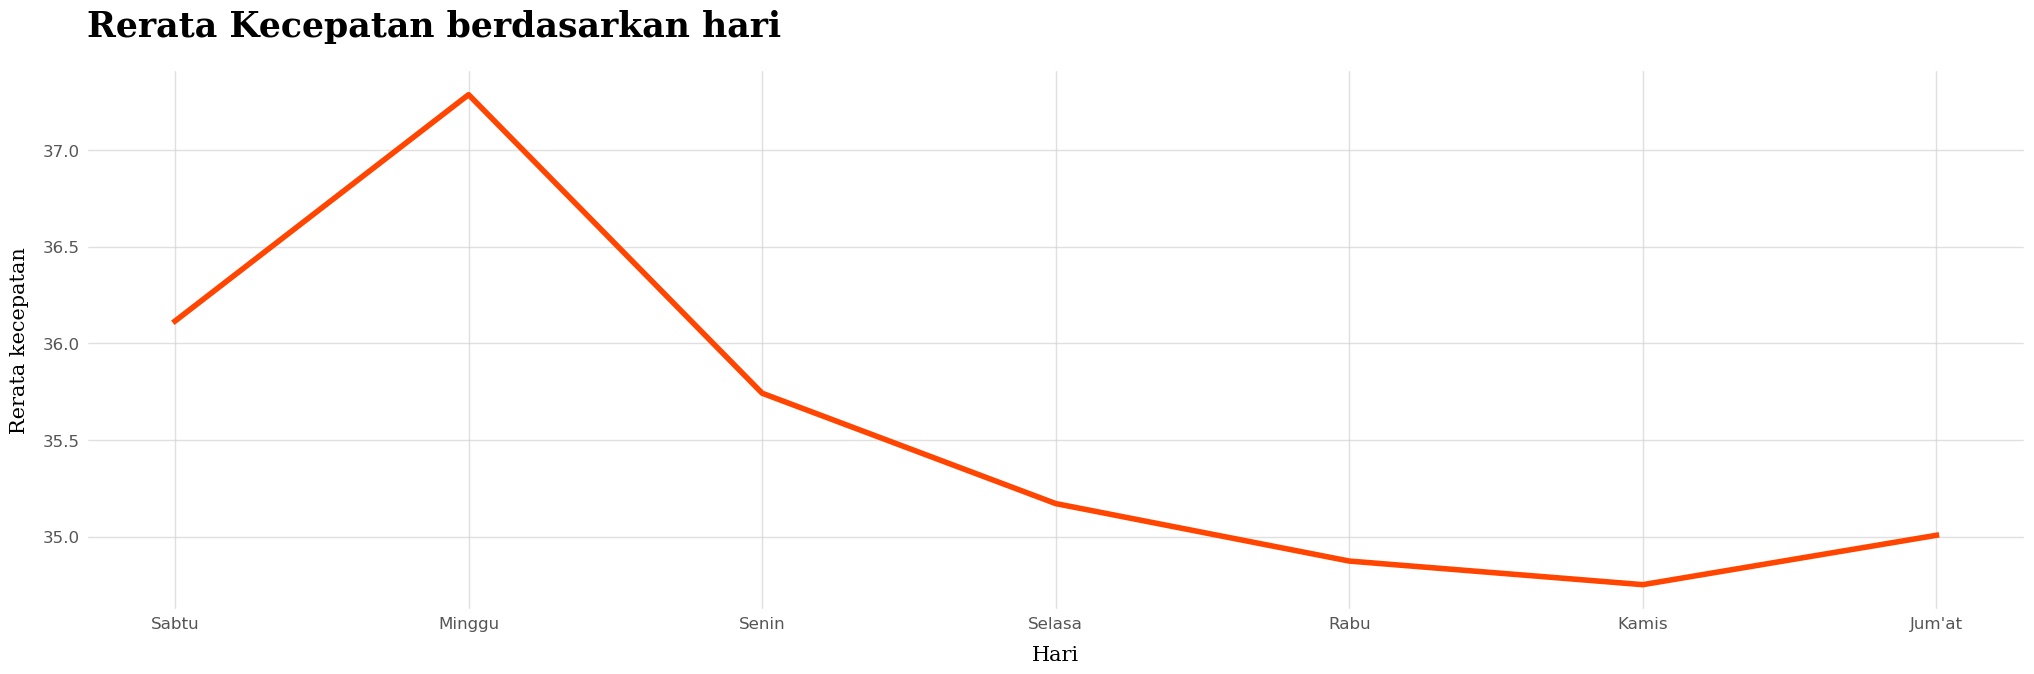

In [26]:
fig = plt.figure(figsize=(25, 7))
fig.set_facecolor("#fff")
ax = fig.add_subplot()
ax.set_facecolor("#fff")
ax.grid(color="lightgrey", alpha=0.7, linewidth=1, axis="both", zorder=0)
sns.lineplot(x="hari_string", y="rerata_kecepatan", color="orangered", err_style=None, data=df_ready, linewidth=4, ax=ax, zorder=2)
ax.yaxis.set_tick_params(color="#000", labelsize=12, pad=5, length=0)
ax.set_ylabel("Rerata kecepatan", fontsize=15, fontfamily="serif", labelpad=10)
ax.set_xlabel("Hari", fontsize=15, fontfamily="serif", labelpad=10)
ax.xaxis.set_tick_params(color="#000", labelsize=12, pad=5, length=0)
ax.yaxis.set_tick_params(color="#000", labelsize=12, pad=5, length=0)
ax.set_title("Rerata Kecepatan berdasarkan hari", loc="left", color="#000", fontsize=25, pad=5, fontweight="bold", fontfamily="serif", y=1.05, zorder=3)
fig.show()

C:\Users\Roisyah\AppData\Local\Temp\ipykernel_1440\2936610316.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


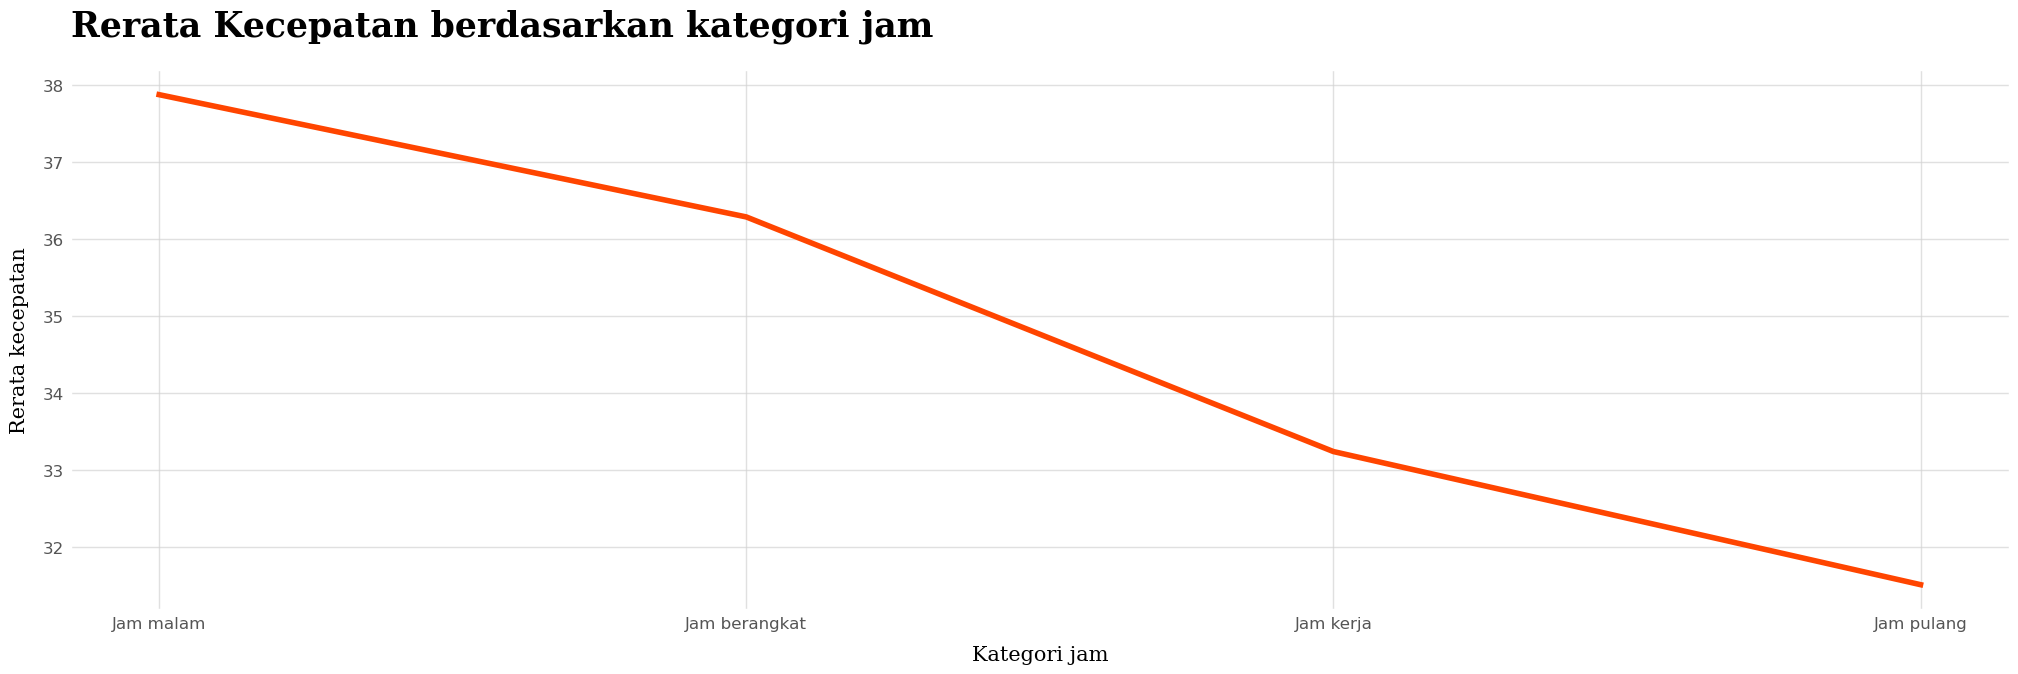

In [27]:
fig = plt.figure(figsize=(25, 7))
fig.set_facecolor("#fff")
ax = fig.add_subplot()
ax.set_facecolor("#fff")
ax.grid(color="lightgrey", alpha=0.7, linewidth=1, axis="both", zorder=0)
sns.lineplot(x="kategori_jam_string", y="rerata_kecepatan", color="orangered", err_style=None, data=df_ready, linewidth=4, ax=ax, zorder=2)
ax.yaxis.set_tick_params(color="#000", labelsize=12, pad=5, length=0)
ax.set_ylabel("Rerata kecepatan", fontsize=15, fontfamily="serif", labelpad=10)
ax.set_xlabel("Kategori jam", fontsize=15, fontfamily="serif", labelpad=10)
ax.xaxis.set_tick_params(color="#000", labelsize=12, pad=5, length=0)
ax.yaxis.set_tick_params(color="#000", labelsize=12, pad=5, length=0)
ax.set_title("Rerata Kecepatan berdasarkan kategori jam", loc="left", color="#000", fontsize=25, pad=5, fontweight="bold", fontfamily="serif", y=1.05, zorder=3)
fig.show()

## 2. Distribution plot of 'rerata_kecepatan'

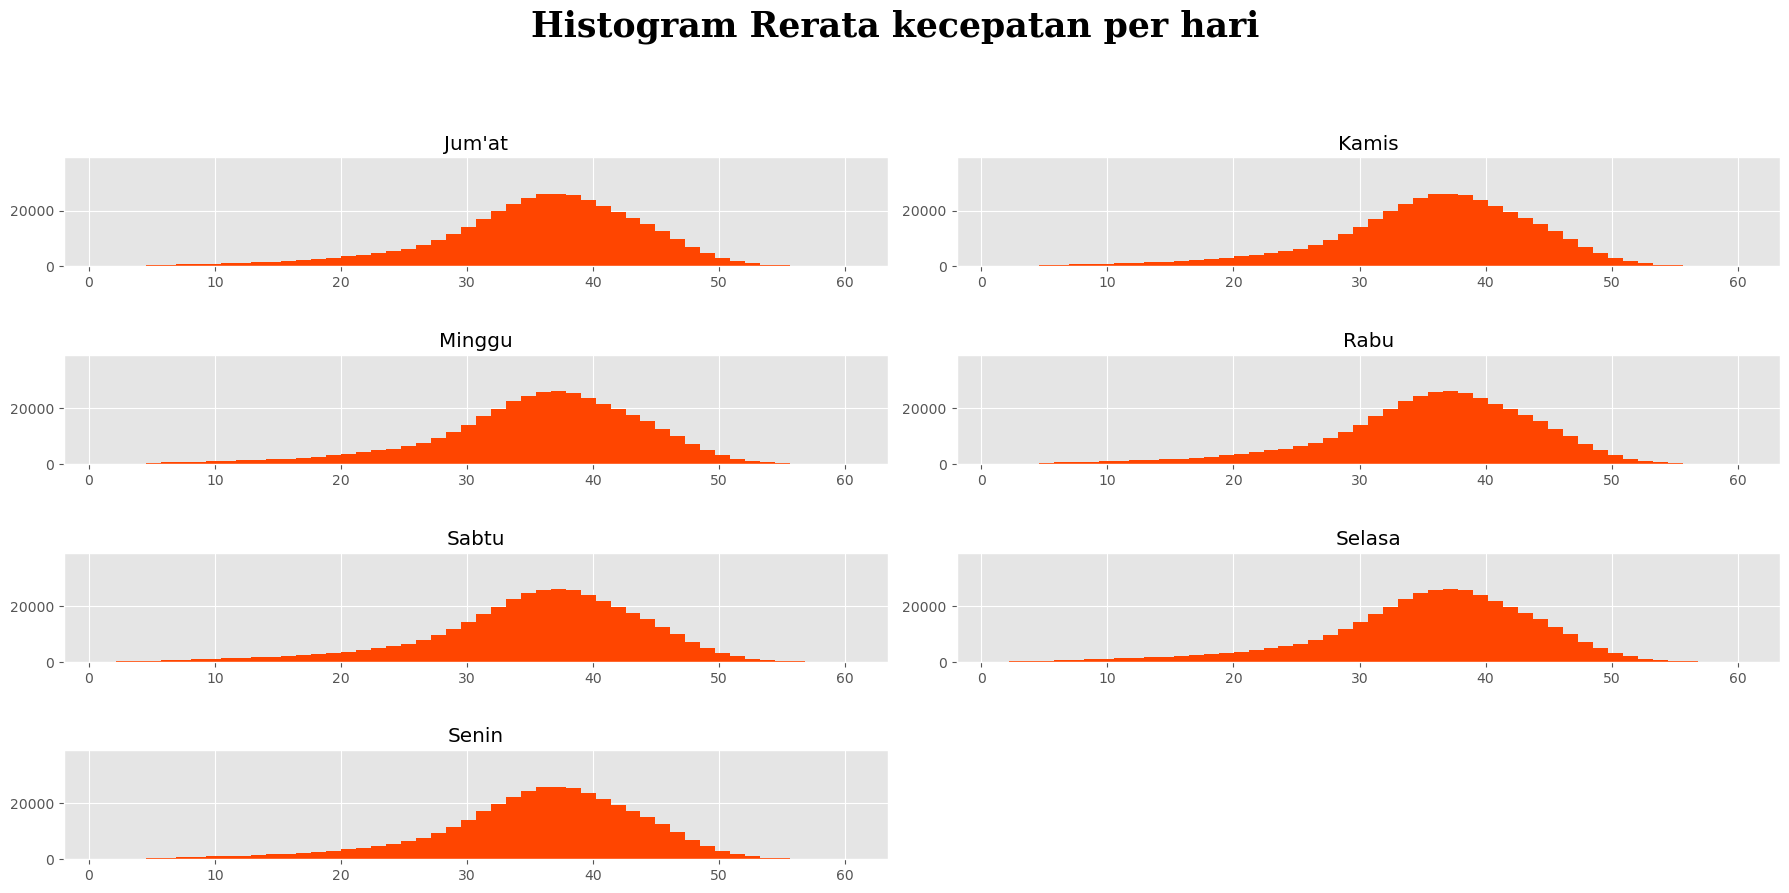

In [28]:
# plot distribusi rerata kecepatan berdasarkan hari

plt.figure(figsize=(18, 12))
for i, (combi, df) in enumerate(df_ready.groupby('hari_string')):
    ax = plt.subplot(6, 2, i+1, ymargin=0.5)
    ax.hist(df_ready.rerata_kecepatan, bins=50, color='orangered')
    #ax.set_xscale('log')
    ax.set_title(combi)
plt.suptitle('Histogram Rerata kecepatan per hari', color="#000", fontsize=25, fontweight="bold", fontfamily="serif", y=1.05, zorder=3)
plt.tight_layout(h_pad=3.0)
plt.show()

C:\Users\Roisyah\AppData\Local\Temp\ipykernel_1440\3097714440.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel=x.name, bins=100, kde=True, color='orangered')


Median: 36.515
Mean: 35.65723296806651
Std Dev: 8.183142012383614


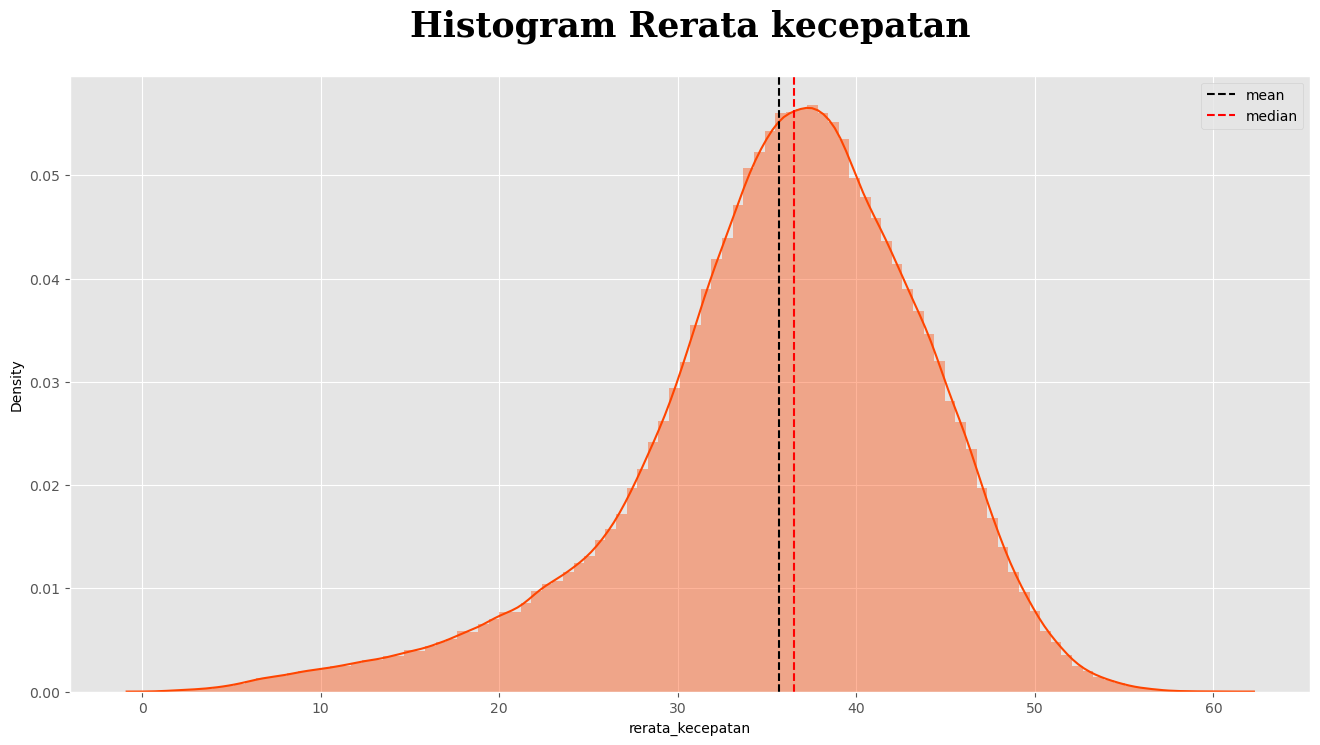

In [30]:
plt.figure(figsize=(16, 8))
x = df_ready["rerata_kecepatan"]
sns.distplot(x, axlabel=x.name, bins=100, kde=True, color='orangered')
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.title('Histogram Rerata kecepatan', color="#000", fontsize=25, fontweight="bold", fontfamily="serif", y=1.05, zorder=3)
plt.show()

## 3. What is the average speed on each 'name' or 'id_jalan'?

In [31]:
#groupby per nama jalan, focused on rerata_kecepatan
by_jalan = df_ready.groupby('name')['rerata_kecepatan'].mean()

#save aggregation into new data frame
by_jalan_df = by_jalan.sort_values(ascending=True).reset_index()
by_jalan_df.rename(columns={'name': 'Nama jalan',
                        'rerata_kecepatan': 'Rerata kecepatan'}, inplace=True)
by_jalan_df

,Nama jalan,Rerata kecepatan
0,Brixton Road,29.226521
1,Tulse Hill,30.609421
2,Harrow Road,30.957776
3,Upper Richmond Road,32.145636
4,Albany Street,33.719361
5,Acre Lane,34.087449
6,Upper Tooting Road,34.185911
7,High Road,34.452393
8,Clapham Road,34.943324
9,Upper Richmond Road West,34.967801


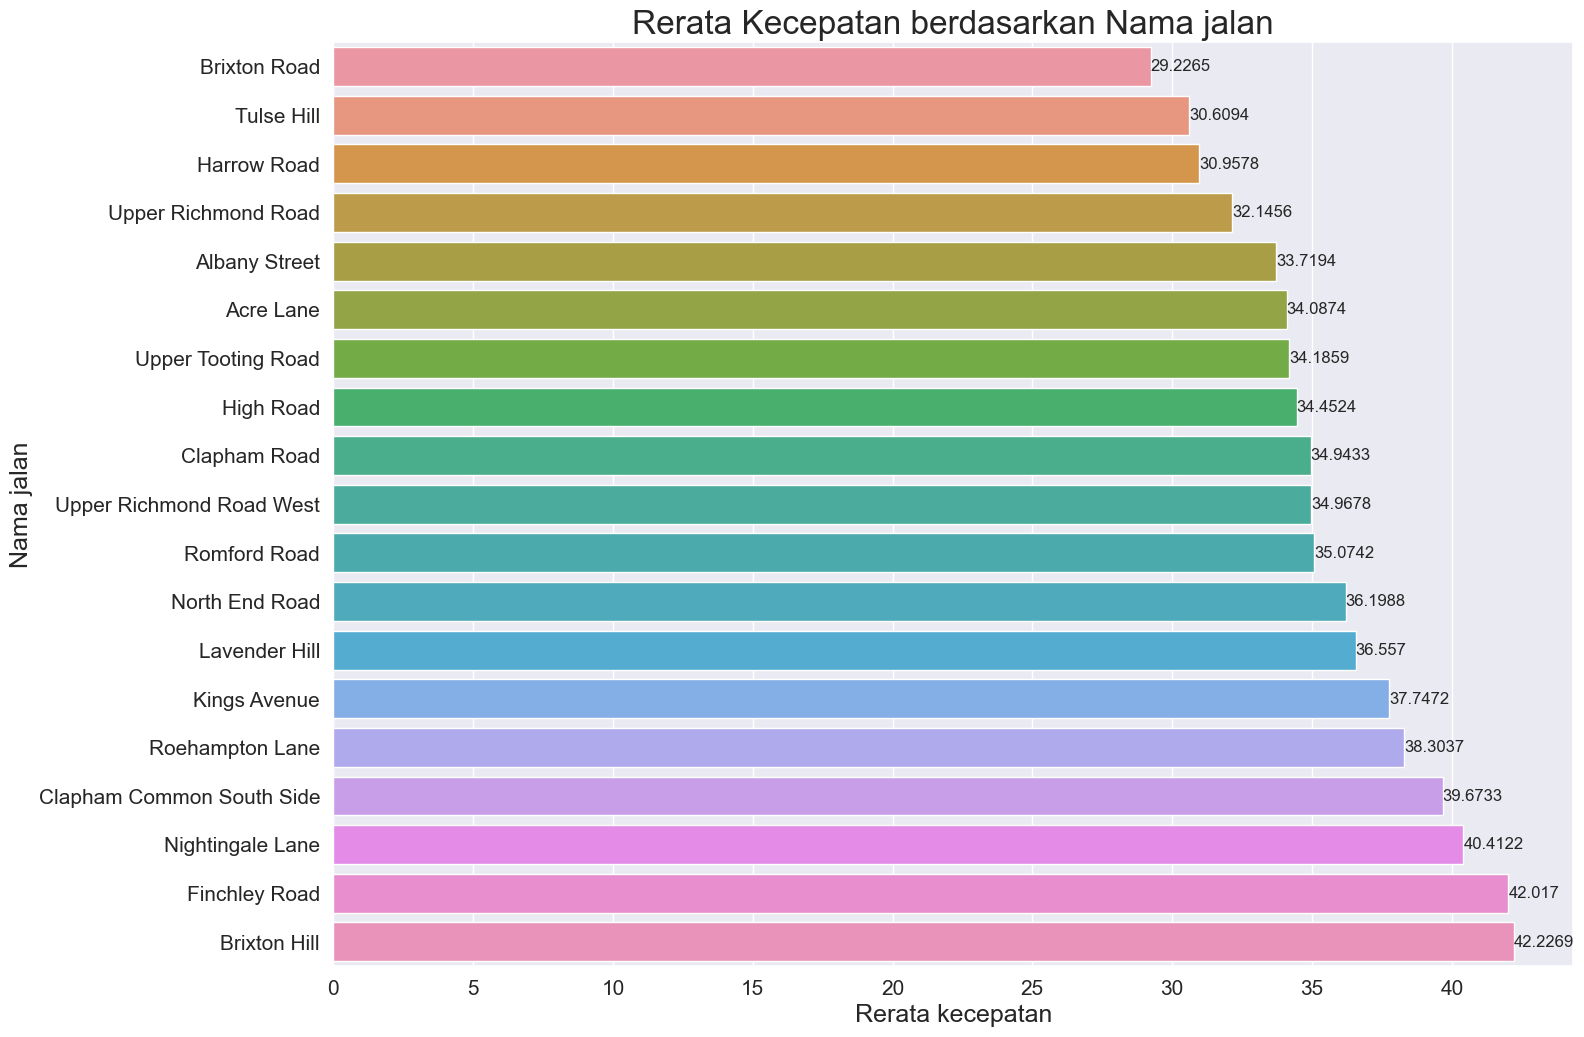

In [32]:
#visualize rerata kecepatan by id jalan
#sort it in descending order, also show its value

sns.set()
fig = plt.figure(figsize = (16,12))
g = sns.barplot(x='Rerata kecepatan',
                y='Nama jalan',
                data=by_jalan_df,
                errorbar=None)
g.bar_label(g.containers[0])
plt.title('Rerata Kecepatan berdasarkan Nama jalan', fontsize = 24)
plt.ylabel('Nama jalan', fontsize = 18)
plt.xlabel('Rerata kecepatan', fontsize = 18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

## 4. Histogram 'Jarak'

In [33]:
df_ready['jarak'].describe()

count    387023.000000
mean          9.349369
std           6.547613
min           0.004953
25%           3.241250
50%           8.573879
75%          14.854605
max          23.005969
Name: jarak, dtype: float64

C:\Users\Roisyah\AppData\Local\Temp\ipykernel_1440\2500085163.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel=x.name, bins=30, kde=True, color='orangered')


Median: 8.573879192074811
Mean: 9.349368889720472
Std Dev: 6.547613138794375


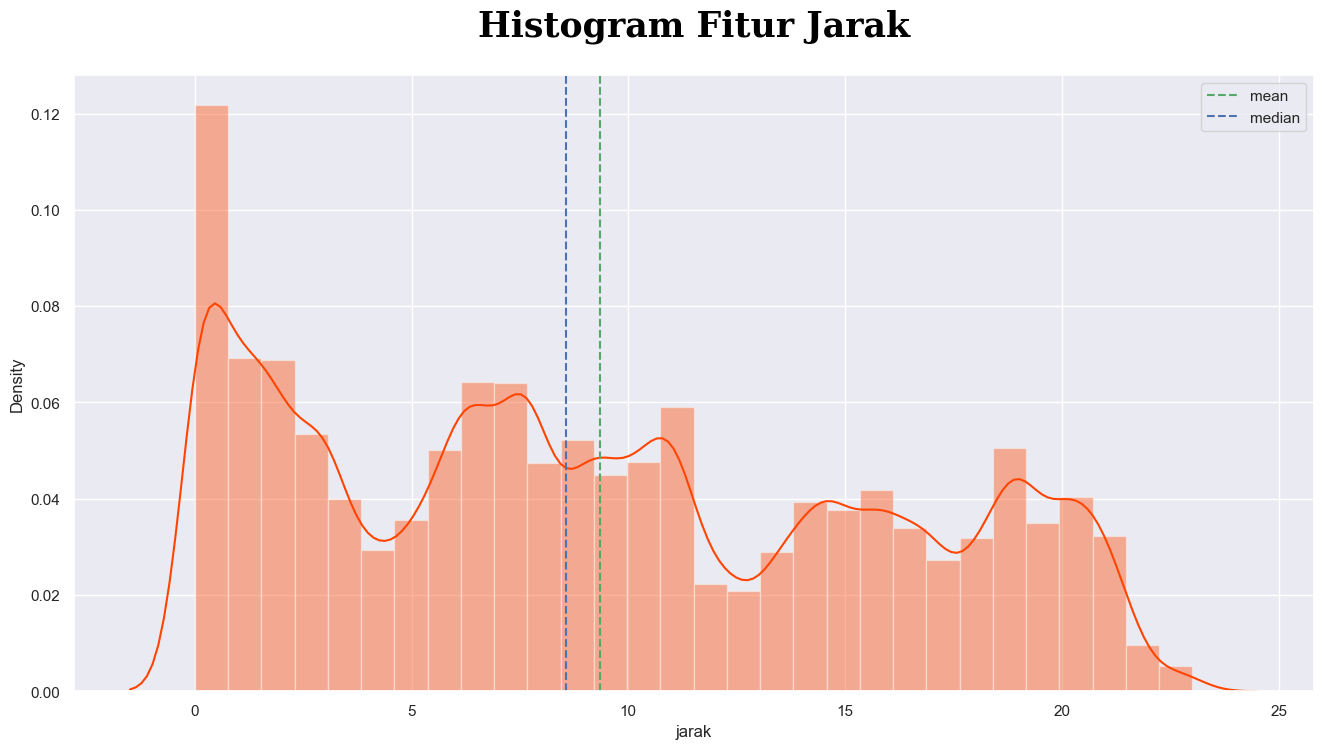

In [34]:
plt.figure(figsize=(16, 8))
x = df_ready["jarak"]
sns.distplot(x, axlabel=x.name, bins=30, kde=True, color='orangered')
line1 = plt.axvline(x.mean(), color="g", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(x), color="b", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.title('Histogram Fitur Jarak', color="#000", fontsize=25, fontweight="bold", fontfamily="serif", y=1.05, zorder=3)
plt.show()

## 5. Explore another features

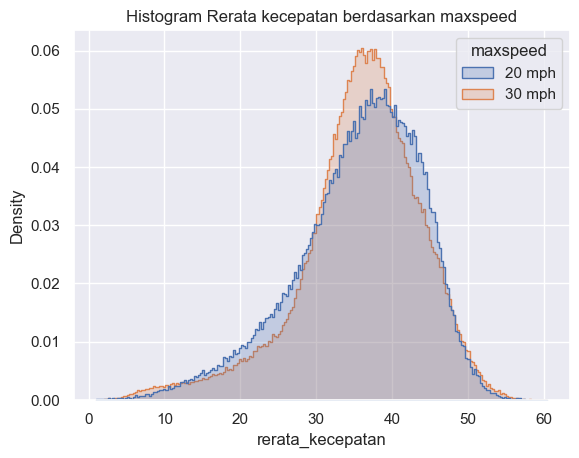

In [36]:
sns.histplot(
    df_ready, x="rerata_kecepatan", hue="maxspeed", element="step",
    stat="density", common_norm=False,
)
plt.title('Histogram Rerata kecepatan berdasarkan maxspeed', fontsize=12)
#plt.savefig('Histogram Rerata kecepatan berdasarkan maxspeed.png')
plt.show()

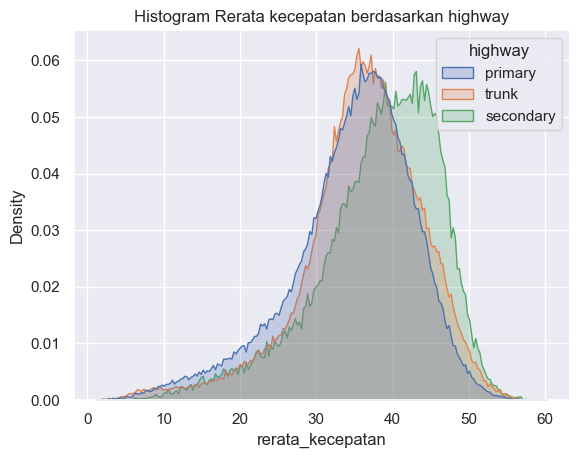

In [37]:
sns.histplot(
    df_ready, x="rerata_kecepatan", hue="highway", element="poly",
    stat="density", common_norm=False
)
plt.title('Histogram Rerata kecepatan berdasarkan highway', fontsize=12)
#plt.savefig('Histogram Rerata kecepatan berdasarkan highway.png')
plt.show()

<Axes: >

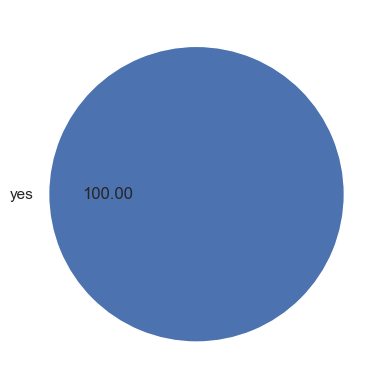

In [38]:
df_ready.groupby('lit').size().plot(kind='pie', autopct='%.2f')
# semua jalan sudah memiliki penerangan dan safety components lainnya

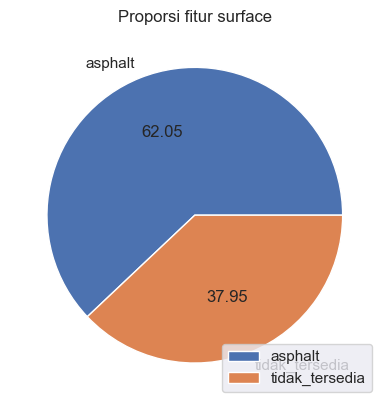

In [39]:
df_ready.groupby('surface').size().plot(kind='pie', autopct='%.2f')
plt.title('Proporsi fitur surface', fontsize=12)
plt.legend()
#plt.savefig('Proporsi fitur surface.png')
plt.show()

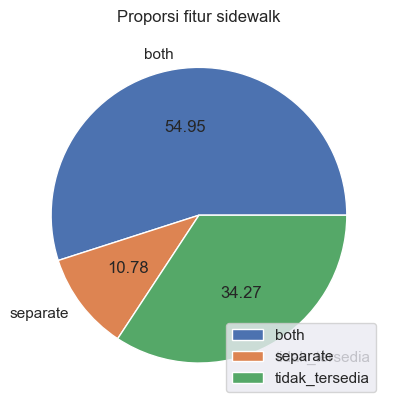

In [40]:
df_ready.groupby('sidewalk').size().plot(kind='pie', autopct='%.2f')
plt.title('Proporsi fitur sidewalk', fontsize=12)
plt.legend()
#plt.savefig('Proporsi fitur sidewalk.png')
plt.show()

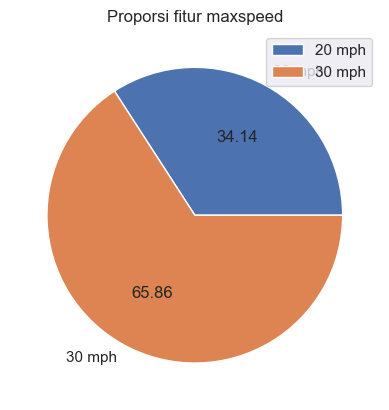

In [41]:
df_ready.groupby('maxspeed').size().plot(kind='pie', autopct='%.2f')
plt.title('Proporsi fitur maxspeed', fontsize=12)
plt.legend()
#plt.savefig('Proporsi fitur maxspeed.png')
plt.show()

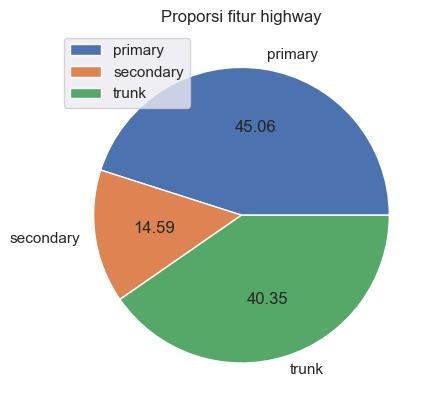

In [42]:
df_ready.groupby('highway').size().plot(kind='pie', autopct='%.2f')
plt.title('Proporsi fitur highway', fontsize=12)
plt.legend()
#plt.savefig('Proporsi fitur highway.png')
plt.show()

## 6. Is the data you have ('rerata_kecepatan') stationary with respect to the mean?

C:\Users\Roisyah\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


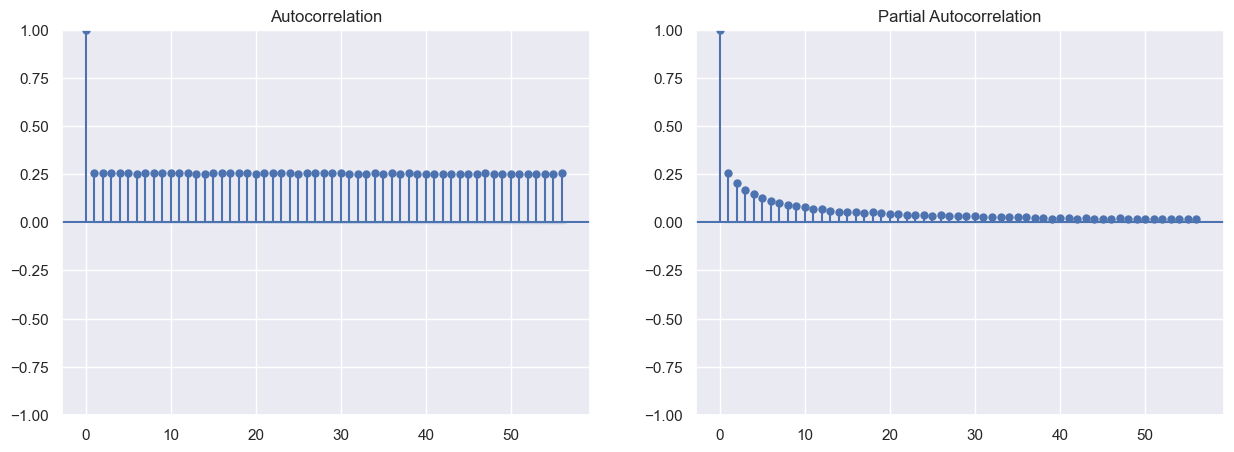

In [43]:
# check stasionarity through ACF and PACF plot

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
plot_acf(df_ready['rerata_kecepatan'], ax=ax1)

ax2 = fig.add_subplot(122)
plot_pacf(df_ready['rerata_kecepatan'], ax=ax2)

#plt.savefig('Plot ACF dan PACF Rerata kecepatan LATEST.png')
plt.show()

## 6. Is there a strong correlation between time features (day, time category, weekend, road ID/road name/ref, distance, and other features) with the average speed?

In [44]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [45]:
cat_copy_cek = df_ready.copy()

cat_copy_cek['id_jalan'] = df['id_jalan'].apply(str)
cat_copy_cek['id_titik_mulai'] = df['id_titik_mulai'].apply(str)
cat_copy_cek['id_titik_akhir'] = df['id_titik_akhir'].apply(str)

cat_fitur = cat_copy_cek[['id_jalan', 'ref', 'name',
                          'id_titik_mulai', 'id_titik_akhir', 
                          'surface', 'sidewalk', 'maxspeed', 'lit', 'highway'
                         ]]

In [48]:
new_df_ready = MultiColumnLabelEncoder(columns = ['id_jalan', 'ref', 'name',
                          'id_titik_mulai', 'id_titik_akhir', 
                          'surface', 'sidewalk', 'maxspeed', 'lit', 'highway']).fit_transform(cat_copy_cek)
new_df_ready.head()

,waktu_setempat,id_jalan,ref,name,id_titik_mulai,id_titik_akhir,rerata_kecepatan,Latitude_awal,Longitude_awal,id_mulai,...,lit,highway,jarak,hari,jam,kategori_jam,hari_string,kategori_jam_string,weekend,weekend_string
0,2020-02-01 01:00:00+00:00,20,2,15,481,481,29.126,51.465569,-0.155776,21390008,...,0,0,2.180476,5,1,4,Sabtu,Jam malam,0,Weekend
1,2020-02-01 01:00:00+00:00,20,12,6,481,481,46.576,51.577065,-0.197102,1677092762,...,0,0,15.490651,5,1,4,Sabtu,Jam malam,0,Weekend
2,2020-02-01 01:00:00+00:00,20,3,16,481,481,36.587,51.622181,-0.176552,26486694,...,0,2,10.199061,5,1,4,Sabtu,Jam malam,0,Weekend
3,2020-02-01 01:00:00+00:00,20,11,1,481,481,34.063,51.530407,-0.228608,1111592522,...,0,0,8.992914,5,1,4,Sabtu,Jam malam,0,Weekend
4,2020-02-01 01:00:00+00:00,20,10,7,481,481,38.336,51.447927,-0.113136,5940503398,...,0,0,3.924888,5,1,4,Sabtu,Jam malam,0,Weekend


### Before feature engineering

In [49]:
no_fit_eng = new_df_ready[['id_jalan', 'ref', 'name',
                          'id_titik_mulai', 'id_titik_akhir', 
                          'surface', 'sidewalk', 'maxspeed', 'highway',
                          'rerata_kecepatan']]

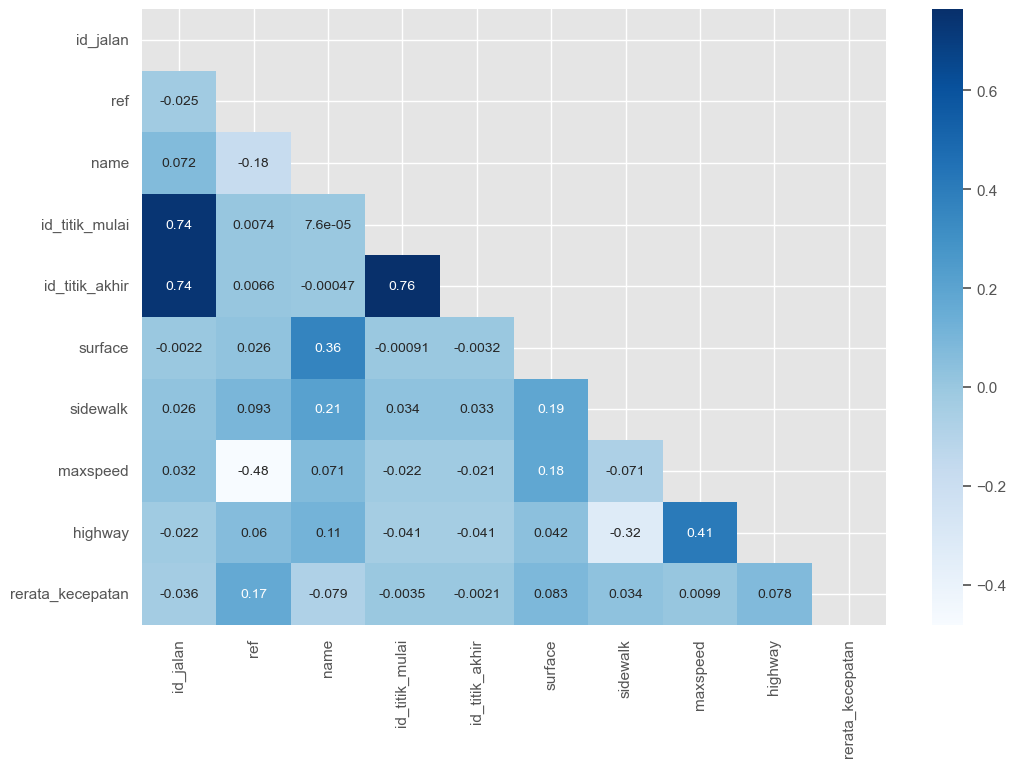

In [50]:
# corr matrix

corr = no_fit_eng.corr()
plt.figure(figsize=(12,8))
#masking the upper triangle part (since matrix is repetitive)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap="Blues", annot=True)
#plt.savefig('korelasi fitur dgn label.png')
plt.show()

## After feature engineering

In [51]:
yuk_cek = new_df_ready[['id_jalan', 'ref', 'name',
                        'id_titik_mulai', 'id_titik_akhir', 
                        'surface', 'sidewalk', 'maxspeed', 'highway',
                        'rerata_kecepatan',
                        'hari', 'weekend', 'jam', 'kategori_jam', 'jarak', 'rerata_kecepatan']]

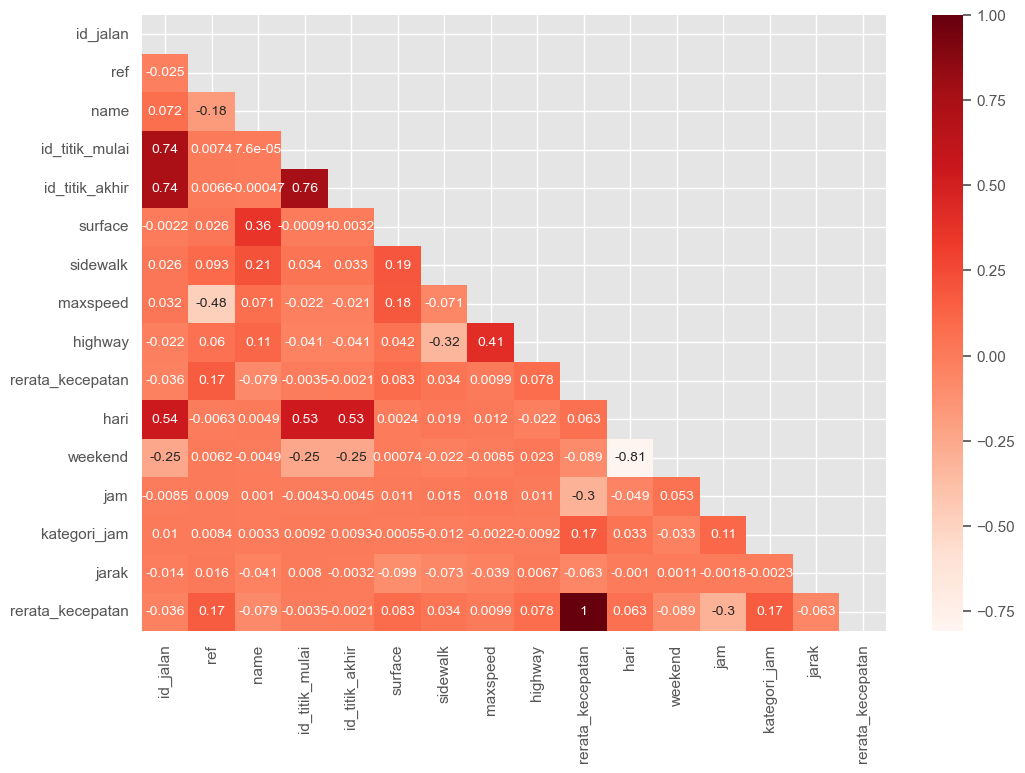

In [52]:
# corr matrix

corr = yuk_cek.corr()
plt.figure(figsize=(12,8))
#masking the upper triangle part (since matrix is repetitive)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap="Reds", annot=True)
plt.savefig('korelasi fitur, label, fitur eng.png')
plt.show()